In [1]:
# import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

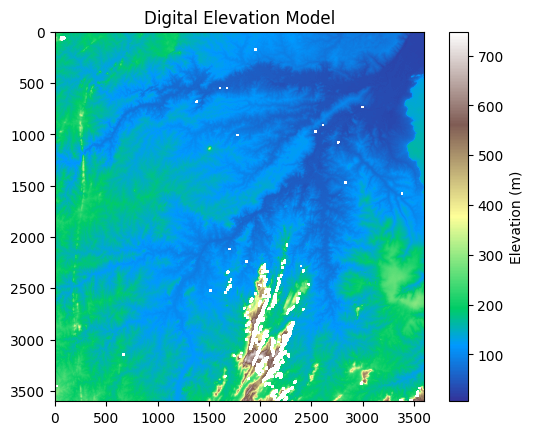

In [2]:
with rasterio.open("s06_w039_1arc_v3.tif") as src:
    dem = src.read(1)
    profile = src.profile
    nodata = src.nodata

# mask no data values
no_data_value = -32767
dem_masked = np.ma.masked_equal(dem, no_data_value)

plt.imshow(dem_masked, cmap='terrain')
plt.title("Digital Elevation Model")
plt.colorbar(label="Elevation (m)")
plt.show()

In [7]:
def load_dem(path):
    with rasterio.open(path) as src:
        dem = src.read(1)
        nodata = src.nodata

        if nodata is not None:
            # Mask no-data values
            dem = np.where(dem == nodata, np.nan, dem)

        return dem

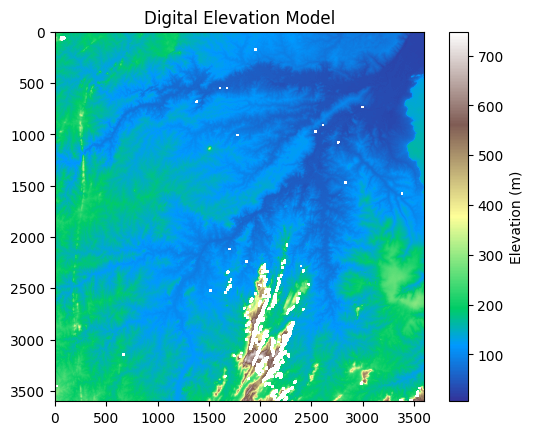

In [8]:
dem = load_dem("s06_w039_1arc_v3.tif")

plt.imshow(dem, cmap='terrain')
plt.title("Digital Elevation Model")
plt.colorbar(label="Elevation (m)")
plt.show()

In [3]:
nodata

-32767.0

In [20]:
dem_masked.min(), dem_masked.max()

(6, 748)

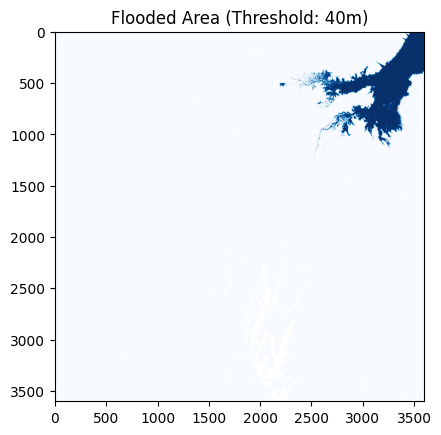

In [12]:
flood_threshold = 40  # meters
flood_mask = (dem_masked <= flood_threshold).astype(int)

plt.imshow(flood_mask, cmap='Blues')
plt.title(f"Flooded Area (Threshold: {flood_threshold}m)")
plt.show()

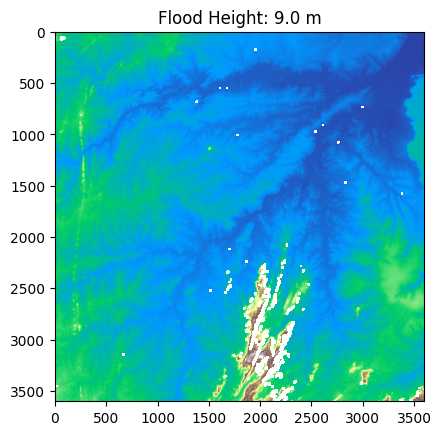

<Figure size 1600x1000 with 0 Axes>

In [ ]:
# Assume 'dem' is a 2D numpy array already loaded
# flood_levels defines how high the flood rises per frame
flood_levels = np.arange(15, 100, 5)

fig, ax = plt.subplots()
img = ax.imshow(dem_masked, cmap='terrain')
flood_overlay = ax.imshow(np.full_like(dem_masked, np.nan), alpha=0.4)
title = ax.set_title("")

def update(frame):
    level = flood_levels[frame]
    height = level - dem_masked.min()
    
    # Apply transparency to non-flooded pixels
    mask = np.where(dem_masked <= level, 1, np.nan)
    flood_overlay.set_data(mask)
    title.set_text(f"Flood Height: {height:.1f} m")
    return flood_overlay, title

ani = FuncAnimation(fig, update, frames=len(flood_levels), interval=300, blit=True)

plt.figure(figsize=(16,10))
plt.show()

In [31]:
ani.save("flood_simulation3.gif", writer='pillow', fps=5)